In [ ]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler

import tensorflow
from keras.layers import LSTM, Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Read the data 

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Fluid-AI/marketprophecy/main/BTC%20USD/BTC-USD%20Training%20Data%20-%201st%20Jan%202016%20to%201st%20Jan%202022.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Fluid-AI/marketprophecy/main/BTC%20USD/BTC-USD%20Out%20of%20Time%20Testing%201st%20Jan%202022%20to%204th%20Feb%202022.csv')

In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


* We will use the open price for prediction 

In [ ]:
train_Set = train.iloc[:,1:2].values
train_Set

array([[  430.721008],
       [  434.622009],
       [  433.578003],
       ...,
       [46490.605469],
       [47169.371094],
       [46311.746094]])

### Scaling the data 

In [ ]:
minmaxsc = MinMaxScaler()

train_Set = minmaxsc.fit_transform(train_Set)

In [ ]:
len(train_Set)

2193

### Splitting the train data into x and y 

In [ ]:
x_train = []
y_train = []

for i in range(120,len(train_Set)):
    x_train.append(train_Set[i-120:i,0])
    y_train.append(train_Set[i,0])
    
# Converting into array    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train

array([[0.00097713, 0.00103519, 0.00101965, ..., 0.00150613, 0.00119023,
        0.00125527],
       [0.00103519, 0.00101965, 0.0009673 , ..., 0.00119023, 0.00125527,
        0.00134115],
       [0.00101965, 0.0009673 , 0.00101208, ..., 0.00125527, 0.00134115,
        0.00124152],
       ...,
       [0.69561563, 0.7210392 , 0.72818968, ..., 0.75072993, 0.74890288,
        0.70341648],
       [0.7210392 , 0.72818968, 0.7389224 , ..., 0.74890288, 0.70341648,
        0.68654856],
       [0.72818968, 0.7389224 , 0.73785869, ..., 0.70341648, 0.68654856,
        0.69665154]])

In [ ]:
y_train

array([0.00134115, 0.00124152, 0.00129285, ..., 0.68654856, 0.69665154,
       0.68388635])

In [ ]:
# Changing the shape of x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Model building 

In [ ]:
model = Sequential()

model.add(LSTM(units = 100,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100,return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 100))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1))

In [ ]:
# Compiling the model 
opt = Adam(learning_rate=0.001)
model.compile(loss = 'mean_squared_error',optimizer = opt)

In [15]:
# Fitting the train data 
history = model.fit(x_train,y_train,validation_split=0.2,epochs = 100,batch_size = 32)

Epoch 1/100
52/52 [==============================] - 43s 580ms/step - loss: 9.0931e-04 - val_loss: 0.0182
Epoch 2/100
52/52 [==============================] - 28s 547ms/step - loss: 3.9954e-04 - val_loss: 0.0318
Epoch 3/100
52/52 [==============================] - 28s 547ms/step - loss: 4.1395e-04 - val_loss: 0.0552
Epoch 4/100
52/52 [==============================] - 28s 540ms/step - loss: 2.9092e-04 - val_loss: 0.0492
Epoch 5/100
52/52 [==============================] - 28s 540ms/step - loss: 3.0750e-04 - val_loss: 0.0579
Epoch 6/100
52/52 [==============================] - 29s 554ms/step - loss: 2.4568e-04 - val_loss: 0.0280
Epoch 7/100
52/52 [==============================] - 29s 561ms/step - loss: 2.8847e-04 - val_loss: 0.0393
Epoch 8/100
52/52 [==============================] - 28s 538ms/step - loss: 2.3081e-04 - val_loss: 0.0099
Epoch 9/100
52/52 [==============================] - 28s 541ms/step - loss: 2.0955e-04 - val_loss: 0.0312
Epoch 10/100
52/52 [==========================

In [16]:
# Plotting relation of train and validation loss
def train_val_loss_plot(model_history):
  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.figure(figsize=(14,8))
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  return

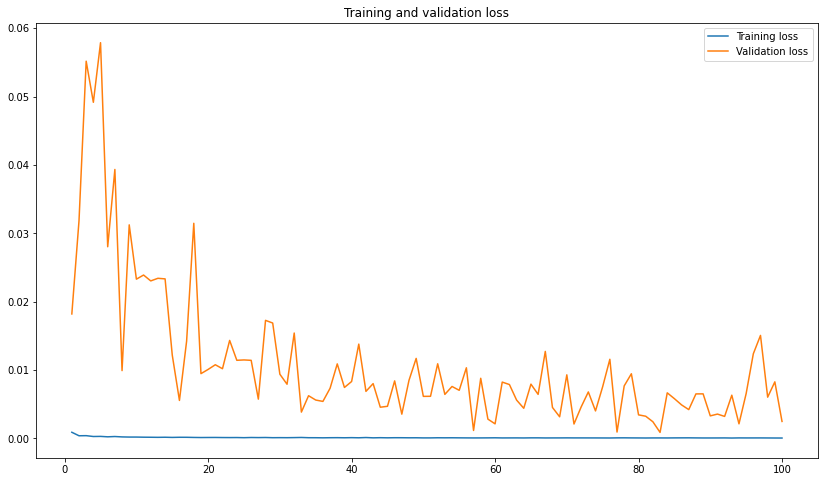

In [17]:
# Plot training and validation
train_val_loss_plot(history)

### Predicting the out of time testing data 

In [18]:
real_stock_price = test.iloc[:,1:2].values

In [28]:
dataset = pd.concat((train['Open'],test['Open']), axis = 0)
inputs = dataset[len(dataset) - len(test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = minmaxsc.transform(inputs)

x_test = []
for i in range(120,155):
    x_test.append(inputs[i-120:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predict = model.predict(x_test)
predict = minmaxsc.inverse_transform(predict)

In [27]:
inputs.shape

(155, 1)

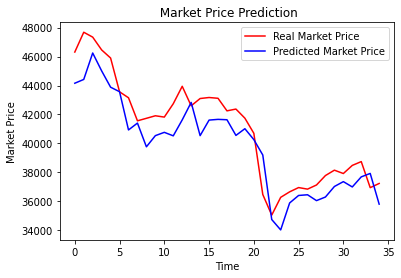

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Market Price')
plt.plot(predict, color = 'blue', label = 'Predicted Market Price')
plt.title(' Market Price Prediction')
plt.xlabel('Time')
plt.ylabel('Market Price')
plt.legend()
plt.show()